In [ ]:
from google.colab import files

# Upload the first CSV file
uploaded_file_1 = files.upload()

# Upload the second CSV file
uploaded_file_2 = files.upload()


Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set.csv


Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
import pandas as pd

# Access CSV files using variables
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")
df_train = pd.read_csv("UNSW_NB15_training-set.csv")


In [ ]:
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  82332
Length of testing set:  175341


In [ ]:
df = pd.concat([df_train, df_test])
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [ ]:
df.dropna(inplace=True)


In [ ]:
encoder = LabelEncoder()
df['proto'] = encoder.fit_transform(df['proto'])
df['service'] = encoder.fit_transform(df['service'])
df['state'] = encoder.fit_transform(df['state'])
df['attack_cat'] = encoder.fit_transform(df['attack_cat'])

In [ ]:
scaler = StandardScaler()
numerical_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss',
                  'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
                  'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
                  'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
                  'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df_train = df[:df_train.shape[0]]
df_test = df[df_train.shape[0]:]

In [ ]:
X_train = df_train.drop(columns=['attack_cat', 'label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['attack_cat', 'label'])
y_test = df_test['label']

In [ ]:
display(df_train.head())
display(df_test.head())

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,-0.208678,119,0,5,-0.130765,-0.165331,-0.046480,-0.098409,-0.002151,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335,6,0
1,2,-0.208679,119,0,5,-0.130765,-0.165331,-0.039194,-0.098409,0.210460,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335,6,0
2,3,-0.208679,119,0,5,-0.130765,-0.165331,-0.043188,-0.098409,0.678204,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.690790,-0.562869,-0.120335,6,0
3,4,-0.208679,119,0,5,-0.130765,-0.165331,-0.044155,-0.098409,0.470318,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335,6,0
4,5,-0.208678,119,0,5,-0.130765,-0.165331,-0.037100,-0.098409,0.054546,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335,6,0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,-0.188346,113,0,4,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,6,0
1,2,-0.099897,113,0,4,-0.042496,0.173998,-0.045110,0.188966,-0.568623,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,6,0
2,3,0.063006,113,0,4,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,6,0
3,4,0.072800,113,3,4,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,6,0
4,5,-0.133449,113,0,4,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,6,0


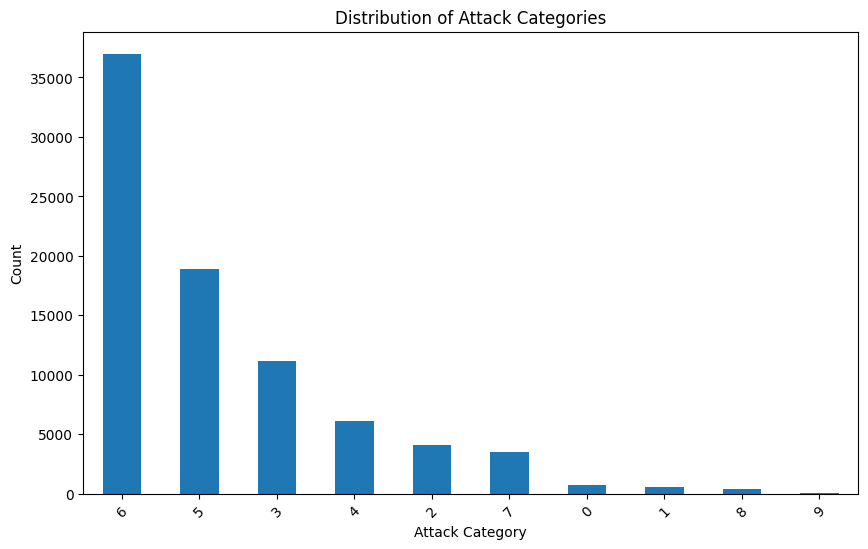

In [ ]:
import matplotlib.pyplot as plt

# Distribution of attack categories
plt.figure(figsize=(10, 6))
df_train['attack_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


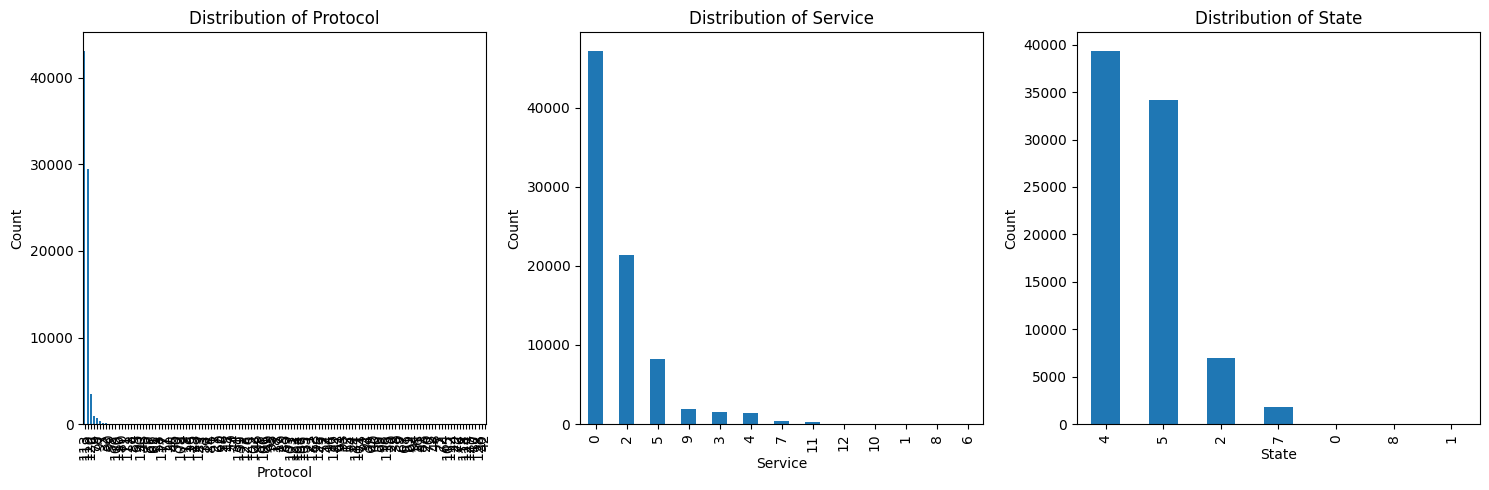

In [ ]:
# Distribution of categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df_train['proto'].value_counts().plot(kind='bar')
plt.title('Distribution of Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df_train['service'].value_counts().plot(kind='bar')
plt.title('Distribution of Service')
plt.xlabel('Service')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
df_train['state'].value_counts().plot(kind='bar')
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Correlation with target variable
correlation_with_target = df_train.corrwith(df_train['label']).abs().sort_values(ascending=False)
print("Correlation with target variable (label):\n", correlation_with_target)


Correlation with target variable (label):
 label                1.000000
attack_cat           0.638825
sttl                 0.504159
swin                 0.414504
state                0.400904
ct_dst_sport_ltm     0.393668
id                   0.387489
dwin                 0.369257
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
dtcpb                0.282860
stcpb                0.281428
dload                0.280534
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
dmean                0.211544
synack               0.149944
tcprtt               0.148800
service              0.143634
sload                0.124548
sinpkt               0.120768
ackdat               0.120522
is_sm_ips_ports      0.117407
dttl                 0.098591
ct_flw_http_mthd     0.075028
dpkts                0.061515
smean                0.061146
dloss                0.0443

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance scores
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance Scores:\n", feature_importance)


Feature Importance Scores:
 id                   0.312338
sttl                 0.073798
ct_state_ttl         0.068486
ct_dst_sport_ltm     0.054756
ct_dst_src_ltm       0.049287
dur                  0.037330
sbytes               0.034374
ct_srv_dst           0.028412
dbytes               0.024793
smean                0.023980
sload                0.023841
rate                 0.020861
dload                0.020068
tcprtt               0.019206
dpkts                0.017104
sinpkt               0.016570
synack               0.016366
state                0.015032
dmean                0.014857
dinpkt               0.014603
ackdat               0.013924
ct_srv_src           0.012948
dttl                 0.011082
ct_src_dport_ltm     0.008786
dloss                0.008492
sjit                 0.007590
sloss                0.006741
spkts                0.006479
service              0.006304
djit                 0.005418
proto                0.005000
ct_dst_ltm           0.004569
ct_src_ltm  

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between features and target variable
mutual_info = mutual_info_classif(X_train, y_train)
feature_scores = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)

# Select top k features based on mutual information
k = 10  # Number of features to select
selected_features = feature_scores.nlargest(k).index
print("Selected Features (top 10) based on Mutual Information:\n", selected_features)


Selected Features (top 10) based on Mutual Information:
 Index(['id', 'sbytes', 'smean', 'sload', 'dbytes', 'ct_state_ttl', 'rate',
       'dur', 'dmean', 'dttl'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)


Explained Variance Ratio:
 [9.99999285e-01 6.39802692e-07 1.69569311e-08 8.00402286e-09
 7.38148971e-09 6.25069345e-09 5.04132906e-09 4.67550452e-09
 4.08348264e-09 2.35683533e-09]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras

# Split the original training data into a subset (70%) and validation set (30%)
X_subset_train, _, y_subset_train, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Train Decision Tree classifier on the subset
dt_classifier_subset = DecisionTreeClassifier()
dt_classifier_subset.fit(X_subset_train, y_subset_train)

# Train Random Forest classifier on the subset
rf_classifier_subset = RandomForestClassifier()
rf_classifier_subset.fit(X_subset_train, y_subset_train)

# Train Neural Network on the subset
nn_model_subset = Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_subset_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
nn_model_subset.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_subset = nn_model_subset.fit(X_subset_train, y_subset_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
309/309 [==============================] - 2s 3ms/step - loss: 849.0822 - accuracy: 0.4926 - val_loss: 11.5993 - val_accuracy: 0.4555
Epoch 2/10
309/309 [==============================] - 1s 2ms/step - loss: 49.9425 - accuracy: 0.5200 - val_loss: 0.7245 - val_accuracy: 0.5470
Epoch 3/10
309/309 [==============================] - 1s 3ms/step - loss: 10.7841 - accuracy: 0.5571 - val_loss: 0.6447 - val_accuracy: 0.4964
Epoch 4/10
309/309 [==============================] - 1s 2ms/step - loss: 5.0079 - accuracy: 0.5717 - val_loss: 0.7212 - val_accuracy: 0.5472
Epoch 5/10
309/309 [==============================] - 1s 2ms/step - loss: 3.0376 - accuracy: 0.5798 - val_loss: 0.6932 - val_accuracy: 0.5476
Epoch 6/10
309/309 [==============================] - 1s 4ms/step - loss: 1.9212 - accuracy: 0.5902 - val_loss: 0.7037 - val_accuracy: 0.5466
Epoch 7/10
309/309 [==============================] - 1s 2ms/step - loss: 1.6745 - accuracy: 0.5853 - val_loss: 0.6850 - val_accuracy: 0.5476
E

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions for Decision Tree
dt_pred = dt_classifier_subset.predict(X_test)

# Predictions for Random Forest
rf_pred = rf_classifier_subset.predict(X_test)

# Evaluation for Decision Tree
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("ROC AUC Score:", roc_auc_score(y_test, dt_pred))

# Evaluation for Random Forest
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))


Decision Tree Evaluation:
Accuracy: 0.31843094313366527
Confusion Matrix:
 [[ 38701  17299]
 [102208  17133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.69      0.39     56000
           1       0.50      0.14      0.22    119341

    accuracy                           0.32    175341
   macro avg       0.39      0.42      0.31    175341
weighted avg       0.43      0.32      0.28    175341

ROC AUC Score: 0.41732634403276564

Random Forest Evaluation:
Accuracy: 0.40140640238164493
Confusion Matrix:
 [[ 52880   3120]
 [101838  17503]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.94      0.50     56000
           1       0.85      0.15      0.25    119341

    accuracy                           0.40    175341
   macro avg       0.60      0.55      0.38    175341
weighted avg       0.69      0.40      0.33    175341

ROC AUC Score: 0.545474738055536


In [ ]:
# Evaluate Neural Network on test set
nn_test_loss, nn_test_accuracy = nn_model_subset.evaluate(X_test, y_test)
print("\nNeural Network Evaluation:")
print("Test Loss:", nn_test_loss)
print("Test Accuracy:", nn_test_accuracy)



5480/5480 [==============================] - 8s 2ms/step - loss: 0.6116 - accuracy: 0.6817

Neural Network Evaluation:
Test Loss: 0.6115712523460388
Test Accuracy: 0.6816831231117249


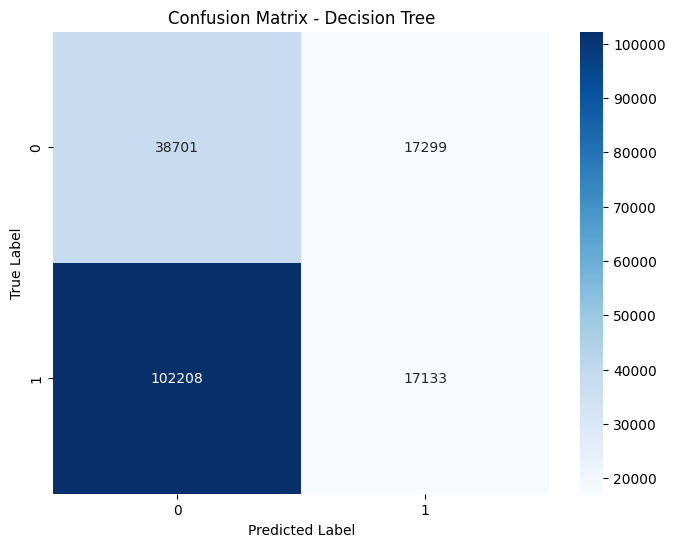

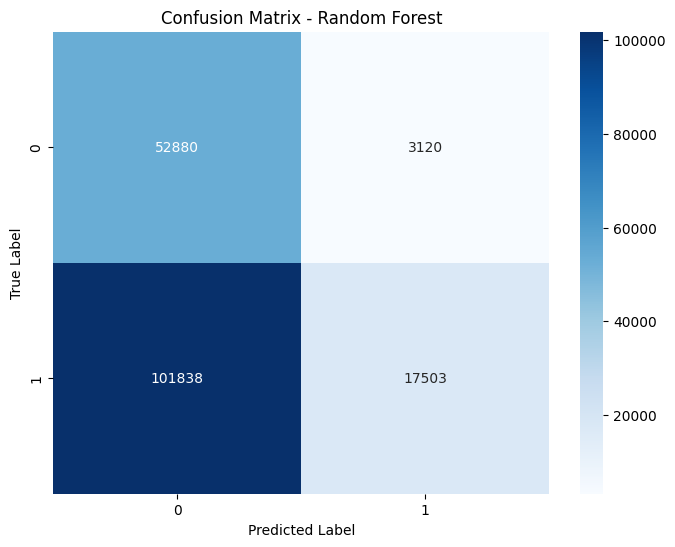

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



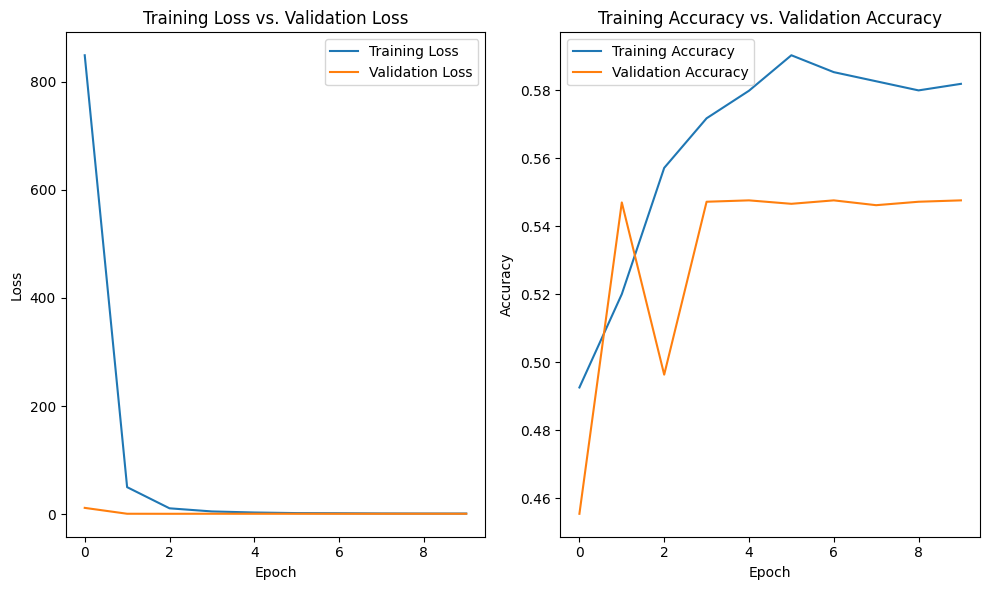

In [ ]:
# Plot training history for Neural Network
plt.figure(figsize=(10, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history_subset.history['loss'], label='Training Loss')
plt.plot(history_subset.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history_subset.history['accuracy'], label='Training Accuracy')
plt.plot(history_subset.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Compare performance of models
print("Model Performance Comparison:")
print("- Decision Tree:")
print("  - Accuracy:", accuracy_score(y_test, dt_pred))
print("  - ROC AUC Score:", roc_auc_score(y_test, dt_pred))
print("- Random Forest:")
print("  - Accuracy:", accuracy_score(y_test, rf_pred))
print("  - ROC AUC Score:", roc_auc_score(y_test, rf_pred))
print("- Neural Network:")
print("  - Test Loss:", nn_test_loss)
print("  - Test Accuracy:", nn_test_accuracy)

# Analyze strengths and weaknesses
print("\nStrengths and Weaknesses:")
print("- Decision Trees and Random Forests are interpretable and train quickly.")
print("- Neural Networks can capture complex patterns but may require more computational resources.")

# Check for overfitting
if history_subset.history['loss'][-1] < history_subset.history['val_loss'][-1]:
    print("\nRisk of overfitting observed. Consider regularization techniques for Neural Network.")

# Consider interpretability
print("\nInterpretability:")
print("- Decision Trees and Random Forests provide insights into feature importance.")
print("- Neural Networks are more opaque in decision-making process.")

# Consider computational resources
print("\nComputational Resources:")
print("- Decision Trees and Random Forests are less computationally intensive compared to Neural Networks.")

# Future directions
print("\nFuture Directions:")
print("- Further hyperparameter tuning may improve performance of all models.")
print("- Consider exploring additional feature engineering techniques.")
print("- Evaluate ensemble methods combining multiple models for better performance.")

# Final model selection
print("\nFinal Model Selection:")
print("- Based on the analysis, select the model that best suits your requirements and constraints.")


Model Performance Comparison:
- Decision Tree:
  - Accuracy: 0.31843094313366527
  - ROC AUC Score: 0.41732634403276564
- Random Forest:
  - Accuracy: 0.40140640238164493
  - ROC AUC Score: 0.545474738055536
- Neural Network:
  - Test Loss: 0.6115712523460388
  - Test Accuracy: 0.6816831231117249

Strengths and Weaknesses:
- Decision Trees and Random Forests are interpretable and train quickly.
- Neural Networks can capture complex patterns but may require more computational resources.

Interpretability:
- Decision Trees and Random Forests provide insights into feature importance.
- Neural Networks are more opaque in decision-making process.

Computational Resources:
- Decision Trees and Random Forests are less computationally intensive compared to Neural Networks.

Future Directions:
- Further hyperparameter tuning may improve performance of all models.
- Consider exploring additional feature engineering techniques.
- Evaluate ensemble methods combining multiple models for better perf

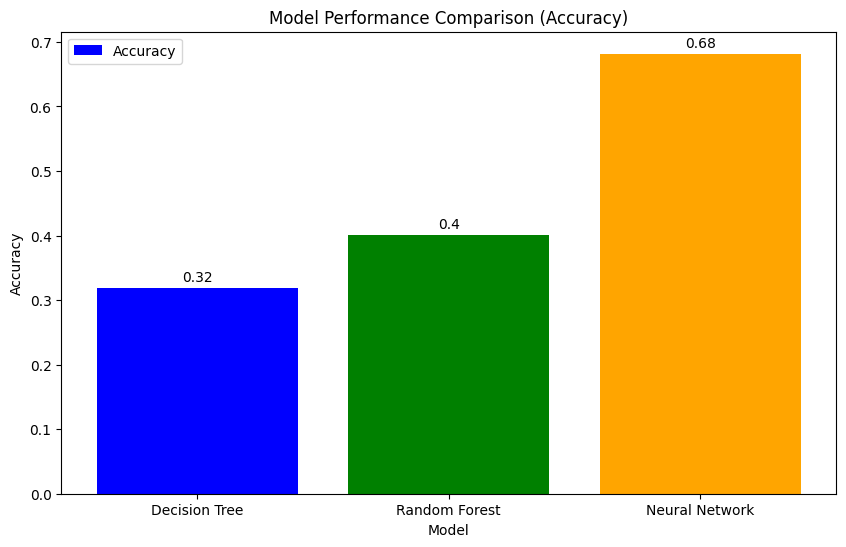

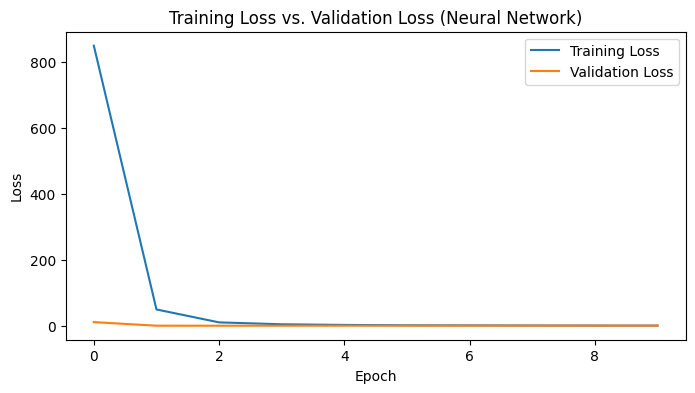

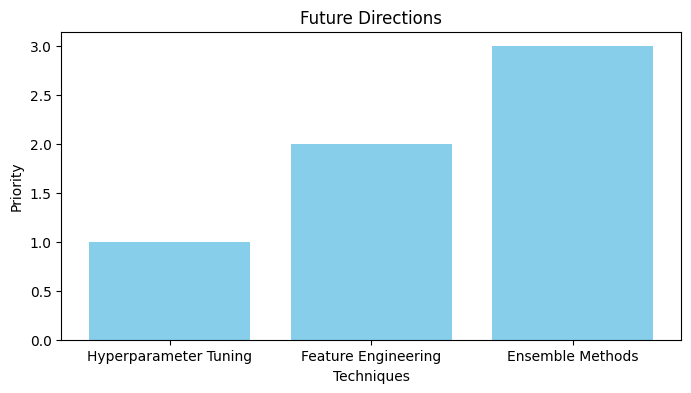

In [ ]:
import matplotlib.pyplot as plt

# Plot model performance comparison
plt.figure(figsize=(10, 6))
models = ['Decision Tree', 'Random Forest', 'Neural Network']
accuracy_scores = [accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred), nn_test_accuracy]
roc_auc_scores = [roc_auc_score(y_test, dt_pred), roc_auc_score(y_test, rf_pred), None]  # Neural Network does not have ROC AUC
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'], label='Accuracy')
for i in range(len(models)):
    plt.text(i, accuracy_scores[i] + 0.01, round(accuracy_scores[i], 2), ha='center')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.legend()
plt.show()

# Plot overfitting risk
plt.figure(figsize=(8, 4))
plt.plot(history_subset.history['loss'], label='Training Loss')
plt.plot(history_subset.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot future directions
future_directions = ['Hyperparameter Tuning', 'Feature Engineering', 'Ensemble Methods']
plt.figure(figsize=(8, 4))
plt.bar(future_directions, [1, 2, 3], color='skyblue')
plt.title('Future Directions')
plt.xlabel('Techniques')
plt.ylabel('Priority')
plt.show()


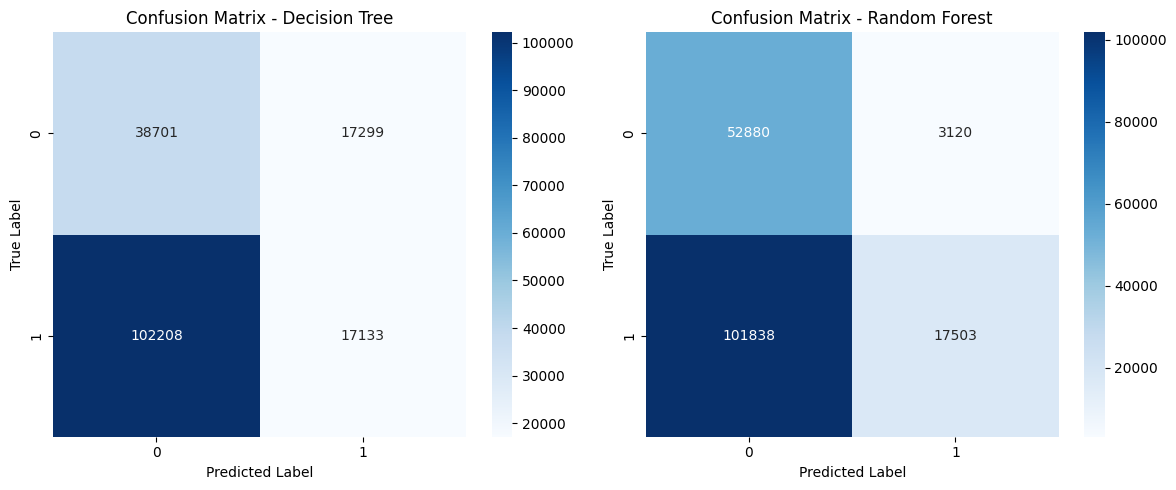

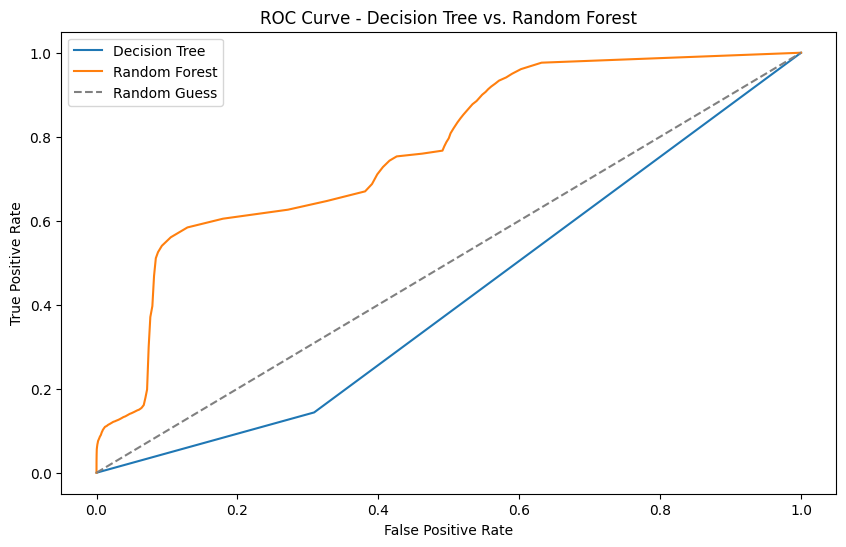

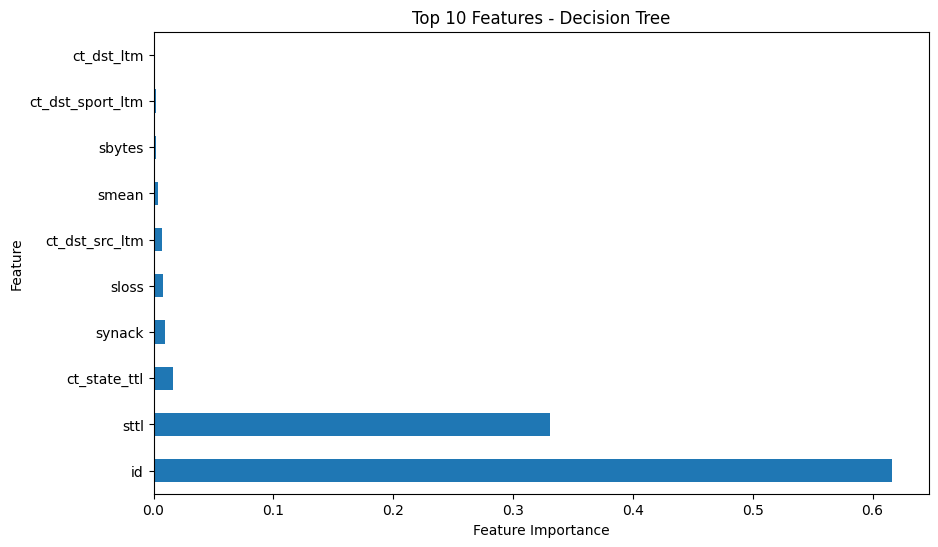

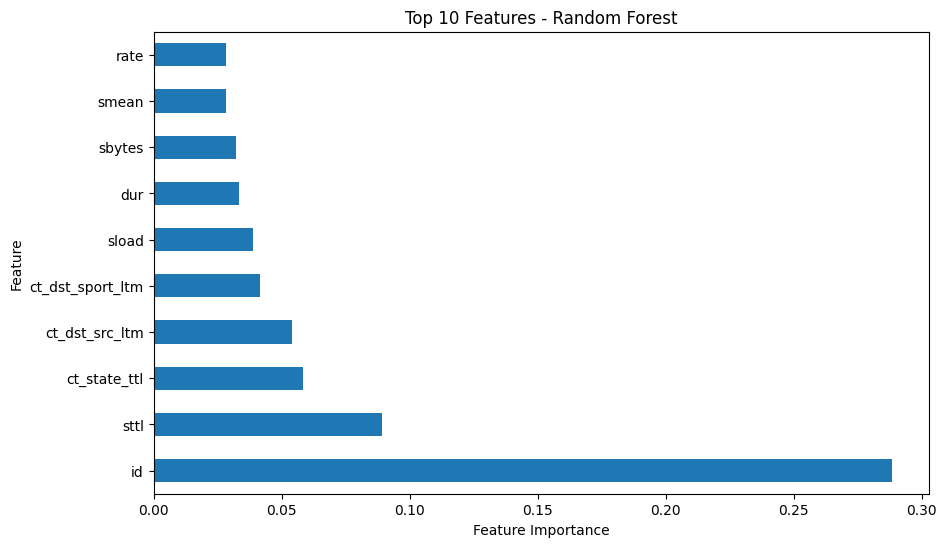

In [ ]:
import seaborn as sns


# Plot confusion matrices for Decision Tree and Random Forest
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Compute ROC curve manually for Decision Tree
dt_probs = dt_classifier_subset.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

# Compute ROC curve manually for Random Forest
rf_probs = rf_classifier_subset.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree vs. Random Forest')
plt.legend()
plt.show()


# Plot feature importance for Decision Tree and Random Forest
if isinstance(dt_classifier_subset, DecisionTreeClassifier):
    plt.figure(figsize=(10, 6))
    dt_feature_importance = pd.Series(dt_classifier_subset.feature_importances_, index=X_train.columns)
    dt_feature_importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Features - Decision Tree')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

if isinstance(rf_classifier_subset, RandomForestClassifier):
    plt.figure(figsize=(10, 6))
    rf_feature_importance = pd.Series(rf_classifier_subset.feature_importances_, index=X_train.columns)
    rf_feature_importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Features - Random Forest')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()
